<a href="https://colab.research.google.com/github/leokim-material/practice/blob/main/kaggle_awesome_hr_data_visualization_%26_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Kaggle: Awesome HR Data Visualization & Prediction
# https://www.kaggle.com/joshuaswords/awesome-hr-data-visualization-prediction/notebook

In [88]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from google.colab import files
import os
import seaborn as sns

In [3]:
#set graph formats
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = 200

In [4]:
#FIND FILES
directory = 'drive/MyDrive/Colab Notebooks/practice/kaggle - awesome hr data visualization & prediction'
file = os.listdir(directory)
for file in file:
  print(file)

aug_test.csv
aug_train.csv
kaggle - awesome hr data visualization & prediction.ipynb


In [ ]:
#READ FLIES
aug_train = pd.read_csv(directory + '/aug_train.csv')
aug_test = pd.read_csv(directory + '/aug_test.csv')

#CLEAN DATA
aug_train.isna().sum()

aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x)
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment'
aug_train['company_size'][aug_train['company_size'] == '10/49'] = '10-49'
aug_train['experience'][aug_train['experience'] == '<1'] = '0'
aug_train['experience'][aug_train['experience'] == '>20'] = '20'

#FILL NA
aug_train['company_size'].fillna('unavailable', inplace=True)
aug_train['company_type'].fillna('unknown', inplace=True)
aug_train['major_discipline'].fillna('unknown', inplace=True)
aug_train['gender'].fillna('Not provided', inplace=True)

#SAME CLEANING ON TEST DATA
aug_test['last_new_job'] = aug_test['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x)
aug_test['enrolled_university'][aug_test['enrolled_university'] == 'no_enrollment'] = 'No Enrollment'
aug_test['company_size'] = np.where(aug_test['company_size'] == '10/49', '10-49', aug_test['company_size'])
aug_test['experience'][aug_test['experience'] == '<1'] = '0'
aug_test['experience'][aug_test['experience'] == '>20'] = '20'

#FILL NA
aug_test['company_size'].fillna('unavailable', inplace=True)
aug_test['company_type'].fillna('unknown', inplace=True)
aug_test['major_discipline'].fillna('unknown', inplace=True)
aug_test['gender'].fillna('Not provided', inplace=True)

In [6]:
# Target: 0 – Not looking for job change, 1 – Looking for a job change
aug_train.groupby(aug_train['gender']).mean()['target']

gender
Female          0.263328
Male            0.227819
Not provided    0.308119
Other           0.261780
Name: target, dtype: float64

In [7]:
#CLEAR REMAINING NA'S
aug_train.dropna(inplace=True)
aug_test.dropna(inplace=True)
aug_train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [8]:
#CONVERT DATATYPE
aug_train['experience'] = aug_train['experience'].astype('int')
aug_test['experience'] = aug_test['experience'].astype('int')

aug_train['training_hours'] = aug_train['training_hours'].astype('int')
aug_test['training_hours'] = aug_test['training_hours'].astype('int')

In [83]:
# ORDER VALUES

ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']
 
# for visuals
train_df = aug_train
test_df = aug_test

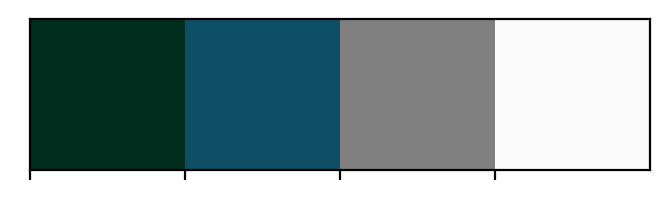

In [10]:
sns.palplot(['#002d1d','#0e4f66','gray','#fbfbfb'])

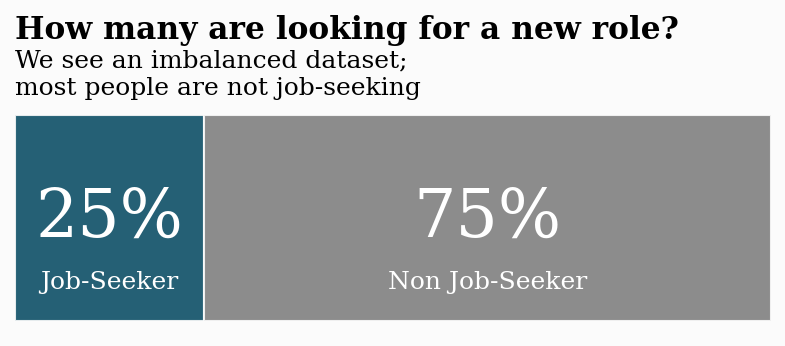

In [50]:
x = train_df.groupby(['target'])['target'].count()
y = len(train_df)
r = ((x/y)).round(2)
ratio = pd.DataFrame(r).T

#FONT FORMAT
title_fontsize = 14
title_fontfamily = 'serif'
title_fontcolor = '#000000'

fig, ax = plt.subplots(1,1, figsize=(6.5, 2), dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) #color of axis
ax.set_facecolor(background_color) #color of graph

#ADD BARS
ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9, ec=background_color, label='Nn Job-Seeker')

#REMOVE GRAPH INDICATORS
ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

# #ADD TEXT
for i in ratio.index:
  ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i), 
              va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily=title_fontfamily,color='white')
  ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25), 
              va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily=title_fontfamily,color='white')

for i in ratio.index:
  ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i] + ratio[0.0][i]/2, i), 
              va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily=title_fontfamily, color='white')
  ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i] + ratio[0.0][i]/2, -0.25), 
              va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily=title_fontfamily, color='white')

#TITLE
fig.text(0.125,1.1,'How many are looking for a new role?', fontfamily=title_fontfamily, fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost people are not job-seeking',fontfamily=title_fontfamily, fontsize=12)  


plt.show()

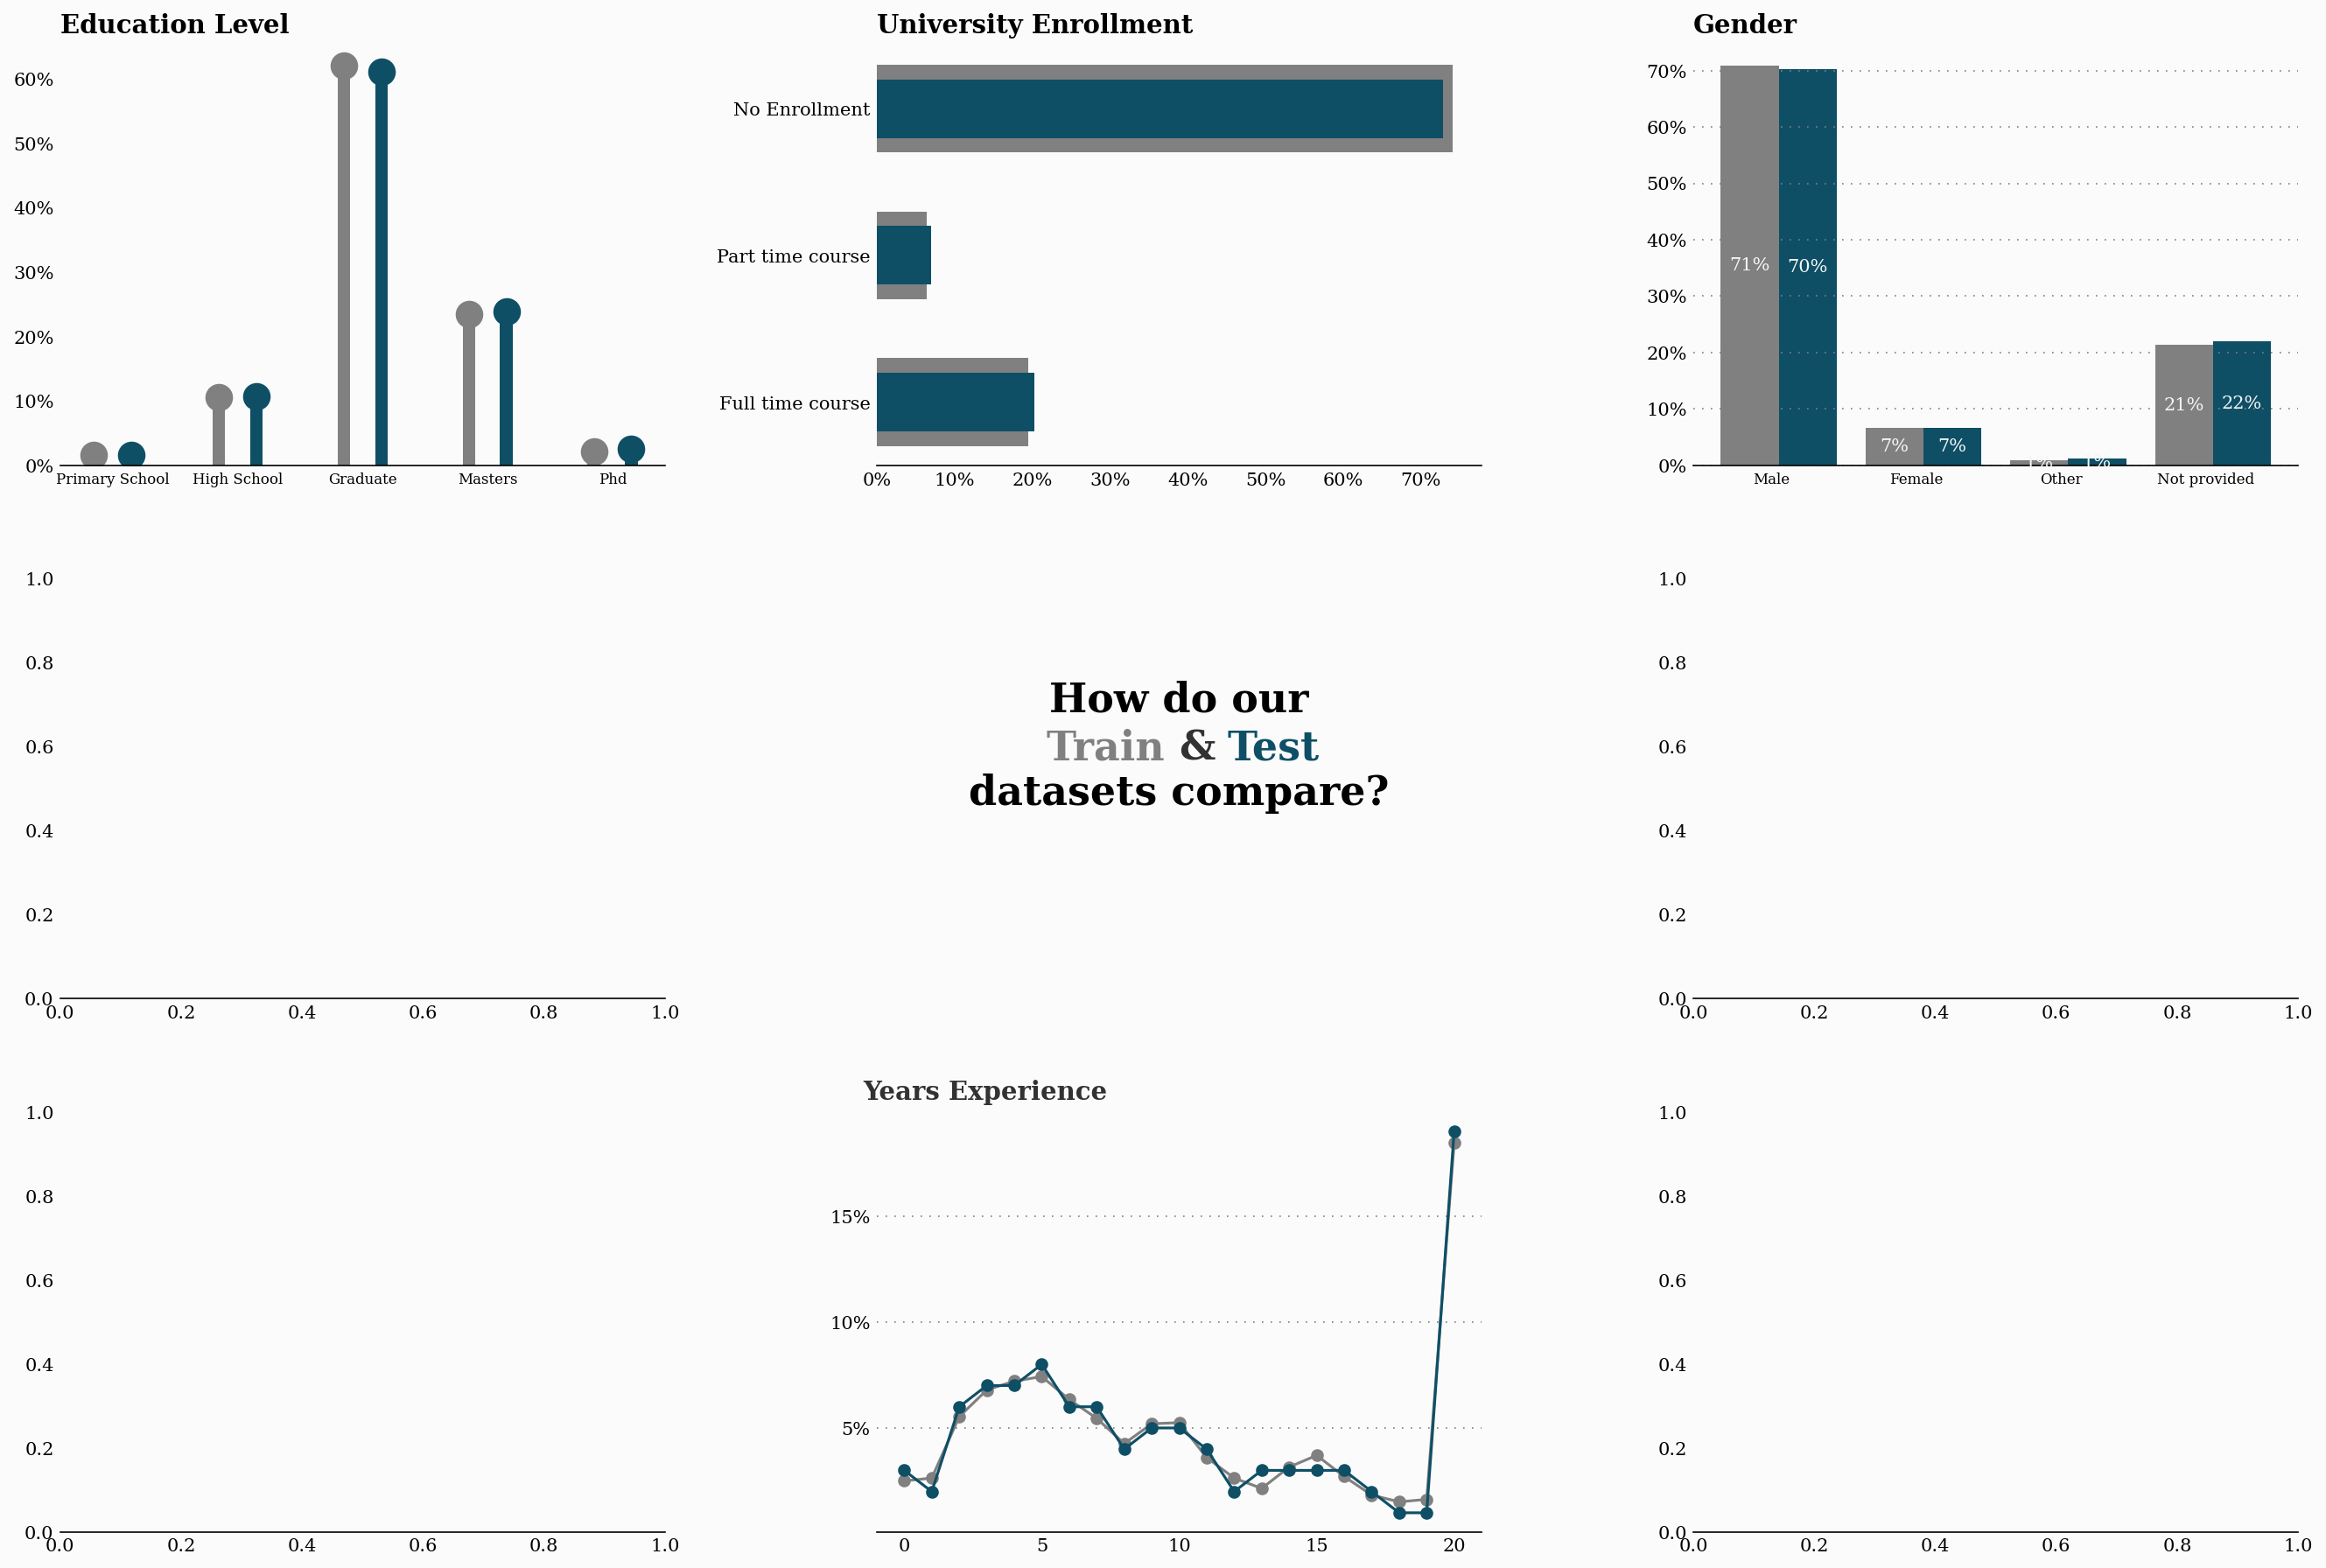

In [12]:
background_color = "#fbfbfb"

#SETUP SUBPLOTS
fig = plt.figure(figsize=(22,15),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

#AX0 - EDUCATION LEVEL
train = pd.DataFrame(train_df['education_level'].value_counts())

train['Percentage'] = train['education_level'].apply(lambda x: x/train['education_level'].sum()*100)
#set specific order
train.index = pd.Categorical(train.index, ed_order)
train = train.sort_index()

test = pd.DataFrame(test_df["education_level"].value_counts())
test["Percentage"] = test["education_level"].apply(lambda x: x/sum(test["education_level"])*100)
#set specific order
test.index = pd.Categorical(test.index, ed_order)
test = test.sort_index()

ax0.bar(np.arange(len(train.index)), height=train["Percentage"], color="gray", width=0.1)
ax0.scatter(np.arange(len(train.index)), train["Percentage"],s=200, color="gray")
ax0.bar(np.arange(len(test.index))+0.3, height=test["Percentage"], color="#0e4f66", width=0.1)
ax0.scatter(np.arange(len(test.index))+0.3, test["Percentage"], s=200, color="#0e4f66")
ax0.text(0,1.03, 'Education Level', fontsize=title_fontsize, fontweight='bold', fontfamily=title_fontfamily, color=title_fontcolor, transform=ax0.transAxes) #transform changes x,y values to 0-1 instead of coordinates of datapoints
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.3/2)
ax0.set_xticklabels(list(train.index),rotation=0, fontsize=8)


#AX1 - ENROLLED IN UNIVERSITY
train = pd.DataFrame(train_df['enrolled_university'].value_counts())
train['Percentage'] = train['enrolled_university'].apply(lambda x: x/sum(train['enrolled_university'])* 100)
train.index = pd.Categorical(train.index, enroll_order)
train = train.sort_index(ascending=False)

test = pd.DataFrame(test_df['enrolled_university'].value_counts())
test['Percentage'] = test['enrolled_university'].apply(lambda x: x/sum(test['enrolled_university'])* 100)
test.index = pd.Categorical(test.index, enroll_order)
test = test.sort_index(ascending=False)

ax1.text(0, 1.03, 'University Enrollment', fontsize=title_fontsize, fontweight='bold', fontfamily=title_fontfamily, color=title_fontcolor, transform=ax1.transAxes)
ax1.barh(train.index, train['Percentage'], color='gray', zorder=3, height=0.6)
ax1.barh(test.index, test['Percentage'], color='#0e4f66', zorder=3, height=0.4)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))


#AX2 - GENDER
train = pd.DataFrame(train_df['gender'].value_counts())
train['Percentage'] = train['gender'].apply(lambda x: x/sum(train['gender']) *100)
train.index = pd.Categorical(train.index, gender_order)
train = train.sort_index()

test = pd.DataFrame(test_df['gender'].value_counts())
test['Percentage'] = test['gender'].apply(lambda x: x/sum(test['gender']) *100)
test.index = pd.Categorical(test.index, gender_order)
test = test.sort_index()

#PLOT
x = np.arange(len(test.index)) #set x points

ax2.bar(x, train['Percentage'], color='gray', width=0.4)
ax2.bar(x+0.4, test['Percentage'], color='#0e4f66', width=0.4)

#GRAPH FORMAT
ax2.text(0,1.03, 'Gender', fontsize=title_fontsize, fontweight='bold', fontfamily=title_fontfamily, color=title_fontcolor, transform=ax2.transAxes) #transform changes x,y values to 0-1 instead of coordinates of datapoints
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax2.set_xticks(np.arange(len(train.index))+0.3/2)
ax2.set_xticklabels(list(train.index),rotation=0, fontsize=8)

for i,j in zip(np.arange(len(train)), train["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip(np.arange(len(train)), test['Percentage']):
    ax2.annotate(f'{j:0.0f}%', xy=(i+0.4,j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


#AX4 CENTER
ax4.spines['bottom'].set_visible(False)
ax4.tick_params(left=False, bottom=False) #tick lines
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'How do our\n\ndatasets compare?', horizontalalignment='center', verticalalignment='center', 
         fontsize=22, fontweight='bold', fontfamily=title_fontfamily)
ax4.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax4.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')


#AX7 
train = pd.DataFrame(train_df["experience"].value_counts())
train["Percentage"] = train["experience"].apply(lambda x: x/sum(train["experience"])*100)
train = train.sort_index()
test = pd.DataFrame(test_df["experience"].value_counts())
test["Percentage"] = round(test["experience"].apply(lambda x: x/sum(test["experience"])*100),).astype(int)
test = test.sort_index()
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax7.plot(train.index, train["Percentage"], zorder=3, color="gray", marker='o')
ax7.plot(test.index, test["Percentage"], zorder=3, color="#0e4f66", marker='o')
ax7.text(-1.5, 20.5, 'Years Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax7.set_yticklabels(labels = ['0   ', '5%','10%','15%'])
ax7.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax7.yaxis.set_major_locator(mtick.MultipleLocator(5))


#set bg color of each graph
for i in range(0,9):
  locals()['ax'+str(i)].set_facecolor(background_color)
#remove tickmarks each graph
for i in range(0,9):
  locals()['ax'+str(i)].tick_params(axis=u'both', which=u'both', length=0)
#rmove spines
for s in ['top','right','left']:
  for i in range(0,9):
    locals()['ax'+str(i)].spines[s].set_visible(False)



plt.show()

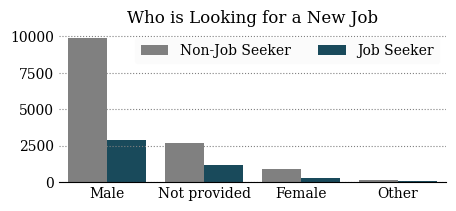

In [13]:
#FORMAT
color_palette=['gray', '#0e4f66']

fig, ax = plt.subplots(1,1, figsize=(5,2), dpi=100)
plt.title('Who is Looking for a New Job')

sns.countplot(x=train_df['gender'], color='#247747', hue=train_df['target'], palette=color_palette)
legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Non-Job Seeker', 'Job Seeker'], ncol=2, facecolor=background_color, edgecolor=background_color)
ax.tick_params(left=False, right=False)

#GRAPH FORMAT

#remove spines
for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

#remove ticks
ax.tick_params(axis=u'both', which=u'both', length=0)

#remove x,y labels
ax.set_xlabel('')
ax.set_ylabel('')

#add gridlines
ax.grid(color='gray', linestyle=':', axis='y')

plt.show()

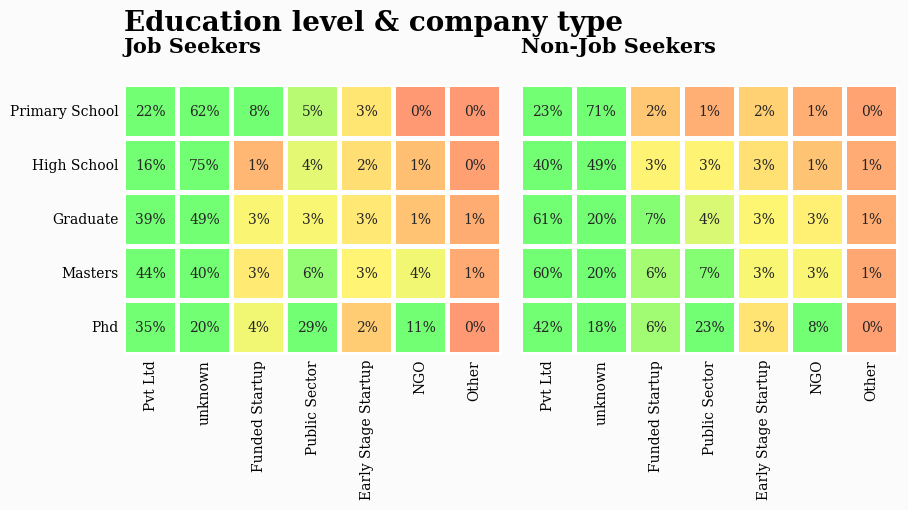

In [117]:
#HEATMAP of those Job seeking and those who aren't categorized by education & industry
job_hunt_only = aug_train.loc[aug_train['target'] == 1]
no_job_hunt_only = aug_train.loc[aug_train['target'] == 0]

#PIVOT TABLE
job_seek = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['company_type'], normalize='index')

job_seek.index = pd.Categorical(job_seek.index, ed_order)
job_seek = job_seek.sort_index()

job_seek.columns = pd.Categorical(job_seek.columns, company_order)
job_seek = job_seek.sort_index(axis=1)

#PIVOT TABLE
no_seek = pd.crosstab(no_job_hunt_only['education_level'],no_job_hunt_only['company_type'], normalize='index')
no_seek.index = pd.Categorical(no_seek.index, ed_order)
no_seek = no_seek.sort_index()

no_seek.columns = pd.Categorical(no_seek.columns, company_order)
no_seek = no_seek.sort_index(axis=1)


#GRAPH
fig = plt.figure(figsize=(10,10), dpi=100)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1,2)
gs.update(wspace=0.05, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

colors = ['#ff7c73', '#fff673', '#73ff73']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=job_seek, linewidths=0.1, vmin=-0.01, vmax=0.075,
            square=True, cbar_kws={'orientation':'horizontal'}, cbar=False, cmap=colormap,
            linewidth=3, annot=True, fmt='1.0%', annot_kws={'fontsize':10})

sns.heatmap(ax=ax1, data=no_seek, linewidths=.1, vmin=-0.01, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,
            yticklabels=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":10})

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 

ax0.text(0,-1, 'Education level & company type',
         fontsize=20,
         fontweight='bold',
         fontfamily='serif')

ax0.text(0, -0.6, 
         'Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax1.text(0, -0.6, 
         'Non-Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
plt.show()